## Clustering different flowers

(The 'hello world'-example of clustering algorithms)

In [78]:
# Importing necessary libraries
from sklearn import datasets
import matplotlib.pyplot as plt
plt.style.use('seaborn')
import pandas as pd
from sklearn.cluster import KMeans

In [89]:
# Loading a flowers dataset
iris_data = datasets.load_iris()

print(iris_data.DESCR[:980])

Iris Plants Database

Notes
-----
Data Set Characteristics:
    :Number of Instances: 150 (50 in each of three classes)
    :Number of Attributes: 4 numeric, predictive attributes and the class
    :Attribute Information:
        - sepal length in cm
        - sepal width in cm
        - petal length in cm
        - petal width in cm
        - class:
                - Iris-Setosa
                - Iris-Versicolour
                - Iris-Virginica
    :Summary Statistics:

    ============== ==== ==== ======= ===== ====================
                    Min  Max   Mean    SD   Class Correlation
    ============== ==== ==== ======= ===== ====================
    sepal length:   4.3  7.9   5.84   0.83    0.7826
    sepal width:    2.0  4.4   3.05   0.43   -0.4194
    petal length:   1.0  6.9   3.76   1.76    0.9490  (high!)
    petal width:    0.1  2.5   1.20  0.76     0.9565  (high!)
    ============== ==== ==== ======= ===== ===================


In [61]:
# Inspect the data numerically
iris_df = pd.DataFrame(iris_data.data, columns=iris_data.feature_names)
iris_df.head()

,sepal length (cm),sepal width (cm),petal length (cm),petal width (cm)
0,5.1,3.5,1.4,0.2
1,4.9,3.0,1.4,0.2
2,4.7,3.2,1.3,0.2
3,4.6,3.1,1.5,0.2
4,5.0,3.6,1.4,0.2


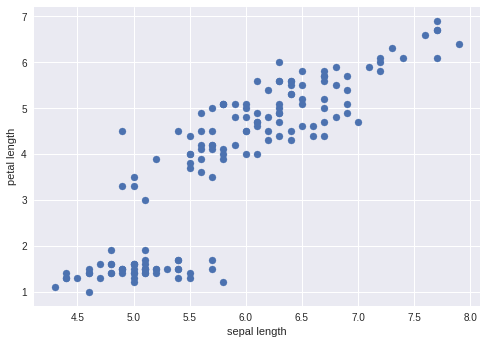

In [77]:
# Inspect the data visually with two relevant features
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 2], cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()

Now we try to find the right number of clusters in the dataset by calculating the sum of the squared distances within the clusters

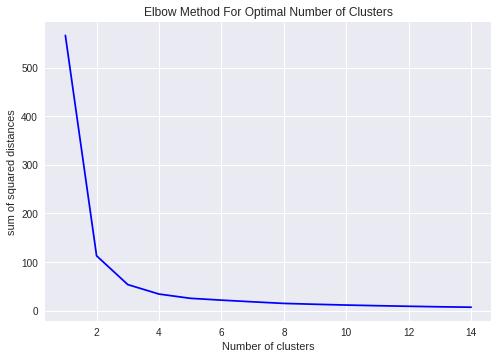

In [82]:
# Calculate the distances for 1 to 15 clusters
squared_distances = []
number_of_clusters = range(1,15)
for k in number_of_clusters:
    km = KMeans(n_clusters=k)
    km = km.fit(iris_df.iloc[:, [0,2]])
    squared_distances.append(km.inertia_)
    
# Plotting these distances for comparisation
plt.plot(number_of_clusters, squared_distances, 'bx-')
plt.xlabel('Number of clusters')
plt.ylabel('sum of squared distances')
plt.title('Elbow Method For Optimal Number of Clusters')
plt.show()

In [90]:
# Declaring Model
model = KMeans(n_clusters=3)

# Fitting Model
guessed_classes = model.fit_predict(iris_df)

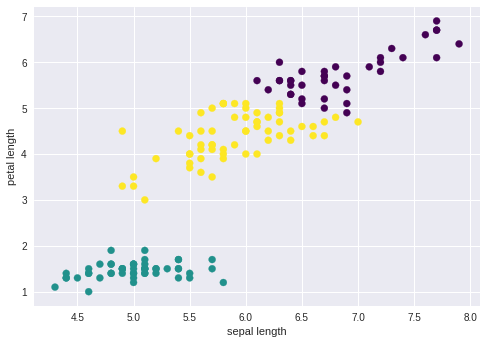

In [91]:
plt.scatter(iris_df.iloc[:, 0], iris_df.iloc[:, 2], c=guessed_classes,cmap='viridis')
plt.xlabel('sepal length')
plt.ylabel('petal length')
plt.show()